In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("a83a246242e4a760c6c4078e93ad481a0fcc66c973fe6a1bec4ff68f85fb9445_Telco-Customer-Churn.csv")

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### EDA / Feature Engineering

##### Convert SeniorCitizen to string

In [10]:
df['SeniorCitizen'].replace(to_replace=[0,1],value=['No','Yes'],inplace=True)

##### Convert TotaCharges to Numerical data

In [11]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


#### Deal with Missing Data

In [14]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The Dataset shows 11 missing datapoints for Total Charges . Lets further explore this

In [15]:
df[df['TotalCharges'].isna()]   # to see the columns having value NaN

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


From the data , I see that each missing value for total charges has a corresponding tenure value of 0 and a churn of No. This doesnt seem logical so i will remove these 11 rows with missing data

In [16]:
df.dropna(inplace=True)

In [17]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Firstly lets check out the target label Churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

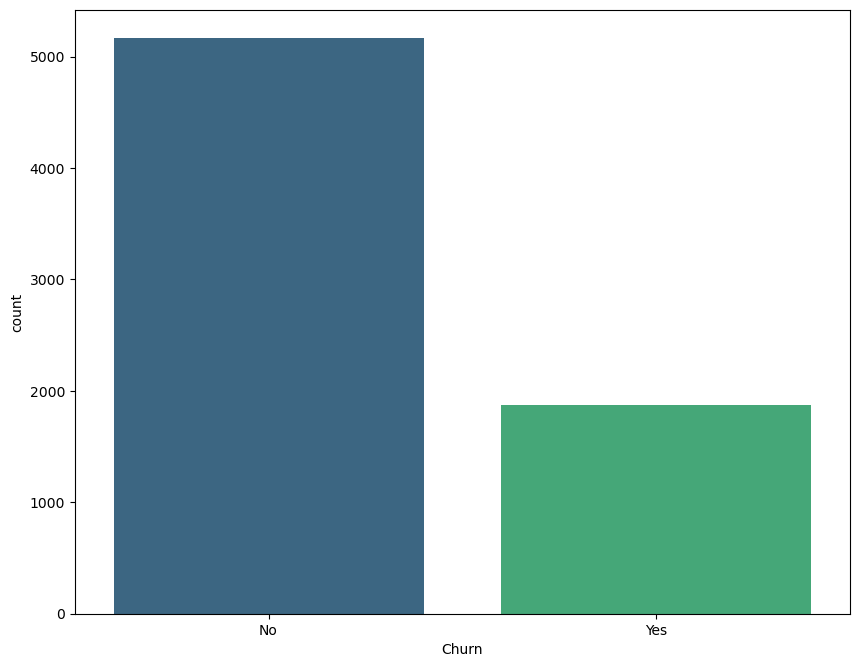

In [18]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(data=df,x='Churn',palette='viridis')

#### Barplot Betwen Gender and Tenure in relation to Churn

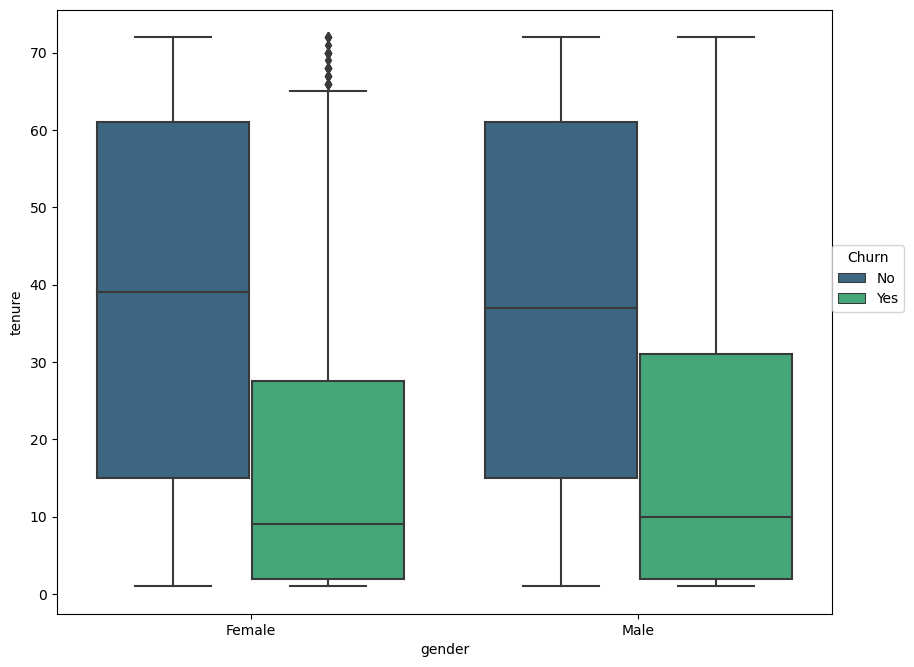

In [19]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,x='gender',y='tenure',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")

The Boxplot shows few tenure outliers for Females who Churn. However as this are miniscule i wont be further exploring those outliers. The barplot also shows regardless of gender, people who have a lower tenure period tend to churn more with identical representations for both genders

#### Boxplot Betwen Gender and MonthlyCharges in relation to Churn

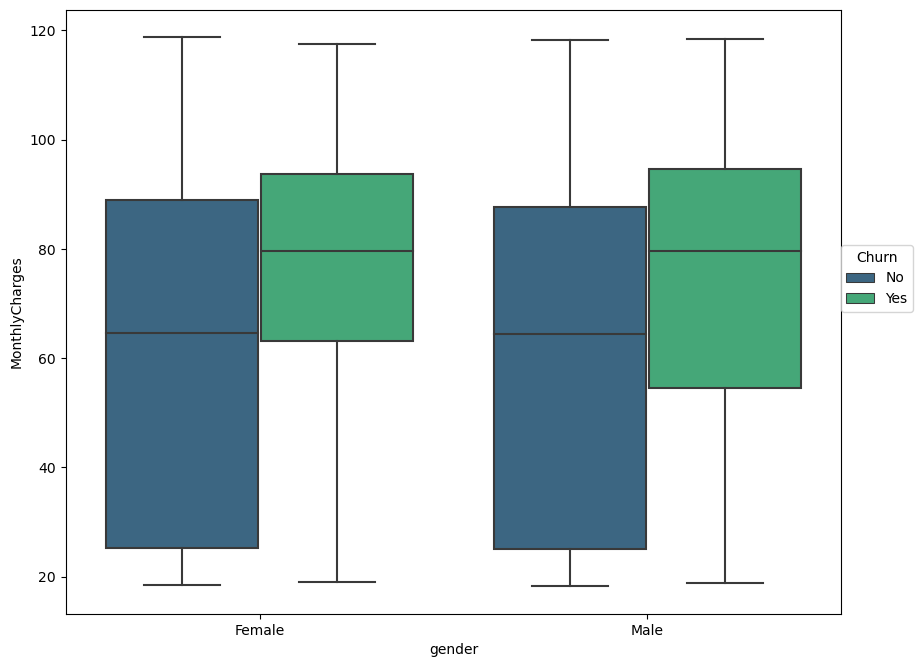

In [20]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,x='gender', y= 'MonthlyCharges',hue='Churn',palette='viridis')
plt.legend(loc=(1,0.5),title = "Churn")

The Boxplot shows no outliers for MonthlyCharges and also shows regardless of gender, people who have higher MonthlyCharges tend to churn more with almsot identical representations for both genders

#### BoxPlot Relationship Between TotalCharges and Gender in Relation to Churn

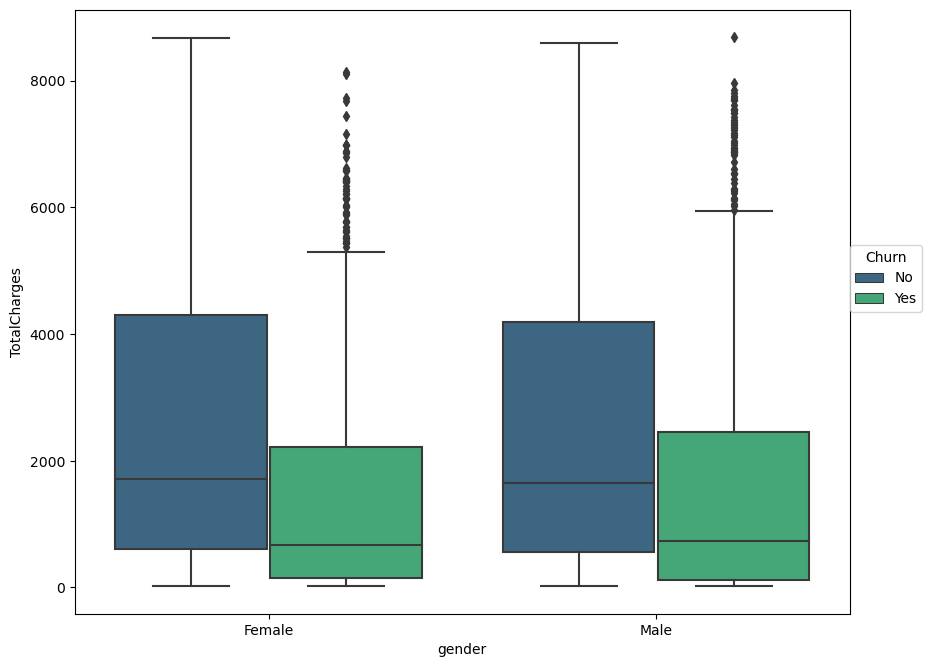

In [21]:
plt.figure(figsize=(10,8),dpi=100)
sns.boxplot(data=df,x='gender',y='TotalCharges',hue='Churn',palette='viridis')

plt.legend(loc=(1,0.5),title = "Churn")

The Boxplot shows a couple outliers which dont seem to unreasonable so i will ignore them to further maintain the purity of the dataset . The Boxplot also shows  regardless of gender, people who have higher TotalCharges tend to churn more with almsot identical representations for both genders

#### CountPlot Relationship Type of Contract and Churn

<AxesSubplot:xlabel='Contract', ylabel='count'>

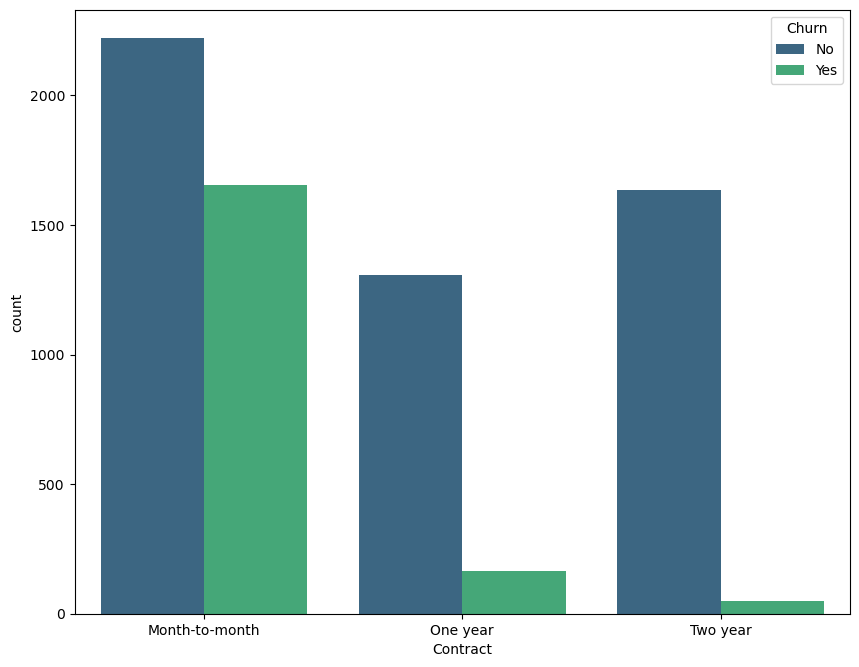

In [22]:
plt.figure(figsize=(10,8),dpi=100)
sns.countplot(data=df,x='Contract',hue='Churn',palette='viridis')

This plot shows a significant trend where people on Month to Month contracts tend to churn more than any other contract type. It also shows Month to Month contracts are the most popular contract type among customers followed by Two year contrcats with One year contracts being the least popular

#### ScattlerPlot Relationship Between TotalCharges and Tenure

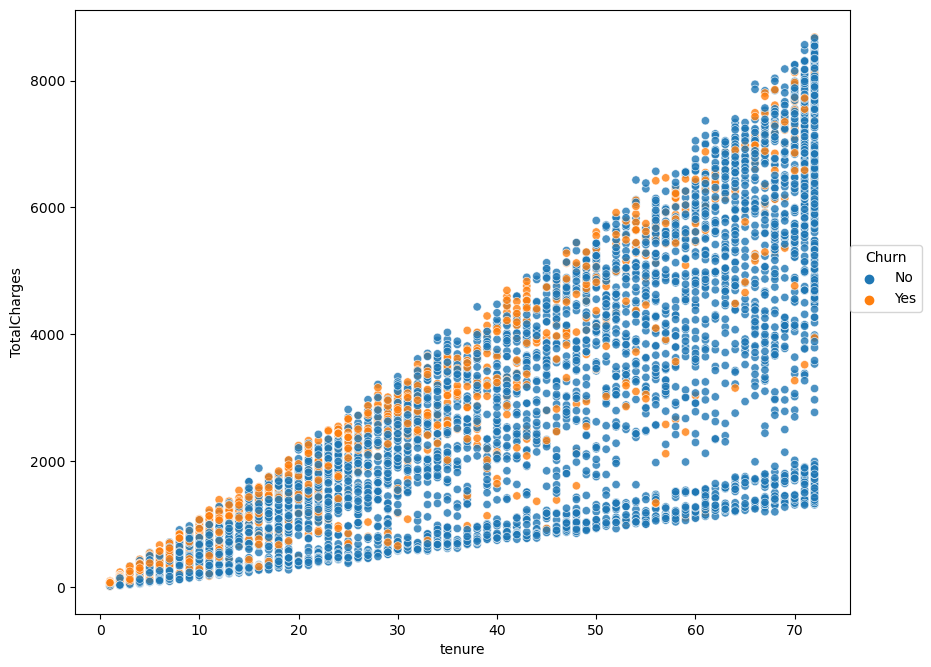

In [23]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn',alpha=0.8)
plt.legend(loc=(1,0.5),title = "Churn")

The Scatterplot shows somewhat of a realtionship where as tenure increases customers tend to churn less. This data makes sense in a realsitic world setting as customers who have stay longer with a company are less likely to leave
##### The scatterplot is not completely clear so lets further explore this by creating churn rates in relation to tenure 

In [24]:
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

<AxesSubplot:xlabel='tenure', ylabel='Rate Customers Choose to Churn(%)'>

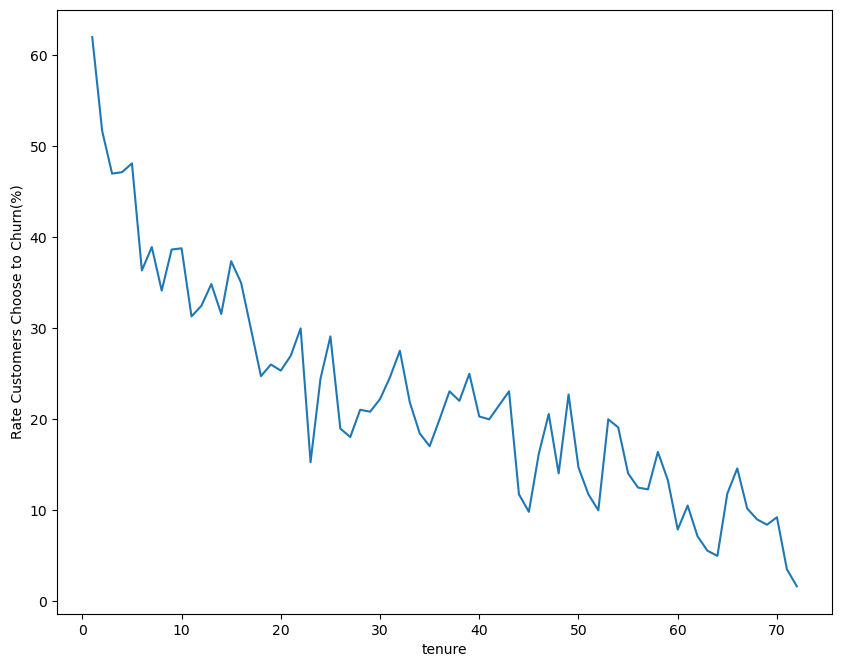

In [25]:
churn_rates_Yes = 100 * yes_churn/(no_churn+yes_churn)
plt.figure(figsize=(10,8),dpi=100)
plt.ylabel('Rate Customers Choose to Churn(%)')
churn_rates_Yes.iloc[0].plot()


I can now safely conclude the initial assumption as true. As seen from the  plot customers who have longer tenure periods definitely tend to churn less

### Plot Coefficient Correlations

To do this plot firstly we need to transform all Object type data to numeric data.Looking at the Dataset there doesnt to be any implied ordering for any featuresusing so we dont need to use Integer Encoding and thus can simply just use OneHotEncoding


In [26]:
df_corr  = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']]).corr()

In [27]:
df_corr.head()

,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
gender_Female,1.000000,-1.000000,-0.001819,0.001819,-0.001379,0.001379,0.010349,-0.010349,-0.007515,0.007515,...,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199,-0.008545,0.008545
gender_Male,-1.000000,1.000000,0.001819,-0.001819,0.001379,-0.001379,-0.010349,0.010349,0.007515,-0.007515,...,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199,0.008545,-0.008545
SeniorCitizen_No,-0.001819,0.001819,1.000000,-1.000000,0.016957,-0.016957,-0.210550,0.210550,0.008392,-0.008392,...,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987,0.150541,-0.150541
SeniorCitizen_Yes,0.001819,-0.001819,-1.000000,1.000000,-0.016957,0.016957,0.210550,-0.210550,-0.008392,0.008392,...,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987,-0.150541,0.150541
Partner_No,-0.001379,0.001379,0.016957,-0.016957,1.000000,-1.000000,0.452269,-0.452269,0.018397,-0.018397,...,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948,-0.149982,0.149982


In [28]:
df_corr['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
SeniorCitizen_No                          -0.150541
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

<AxesSubplot:>

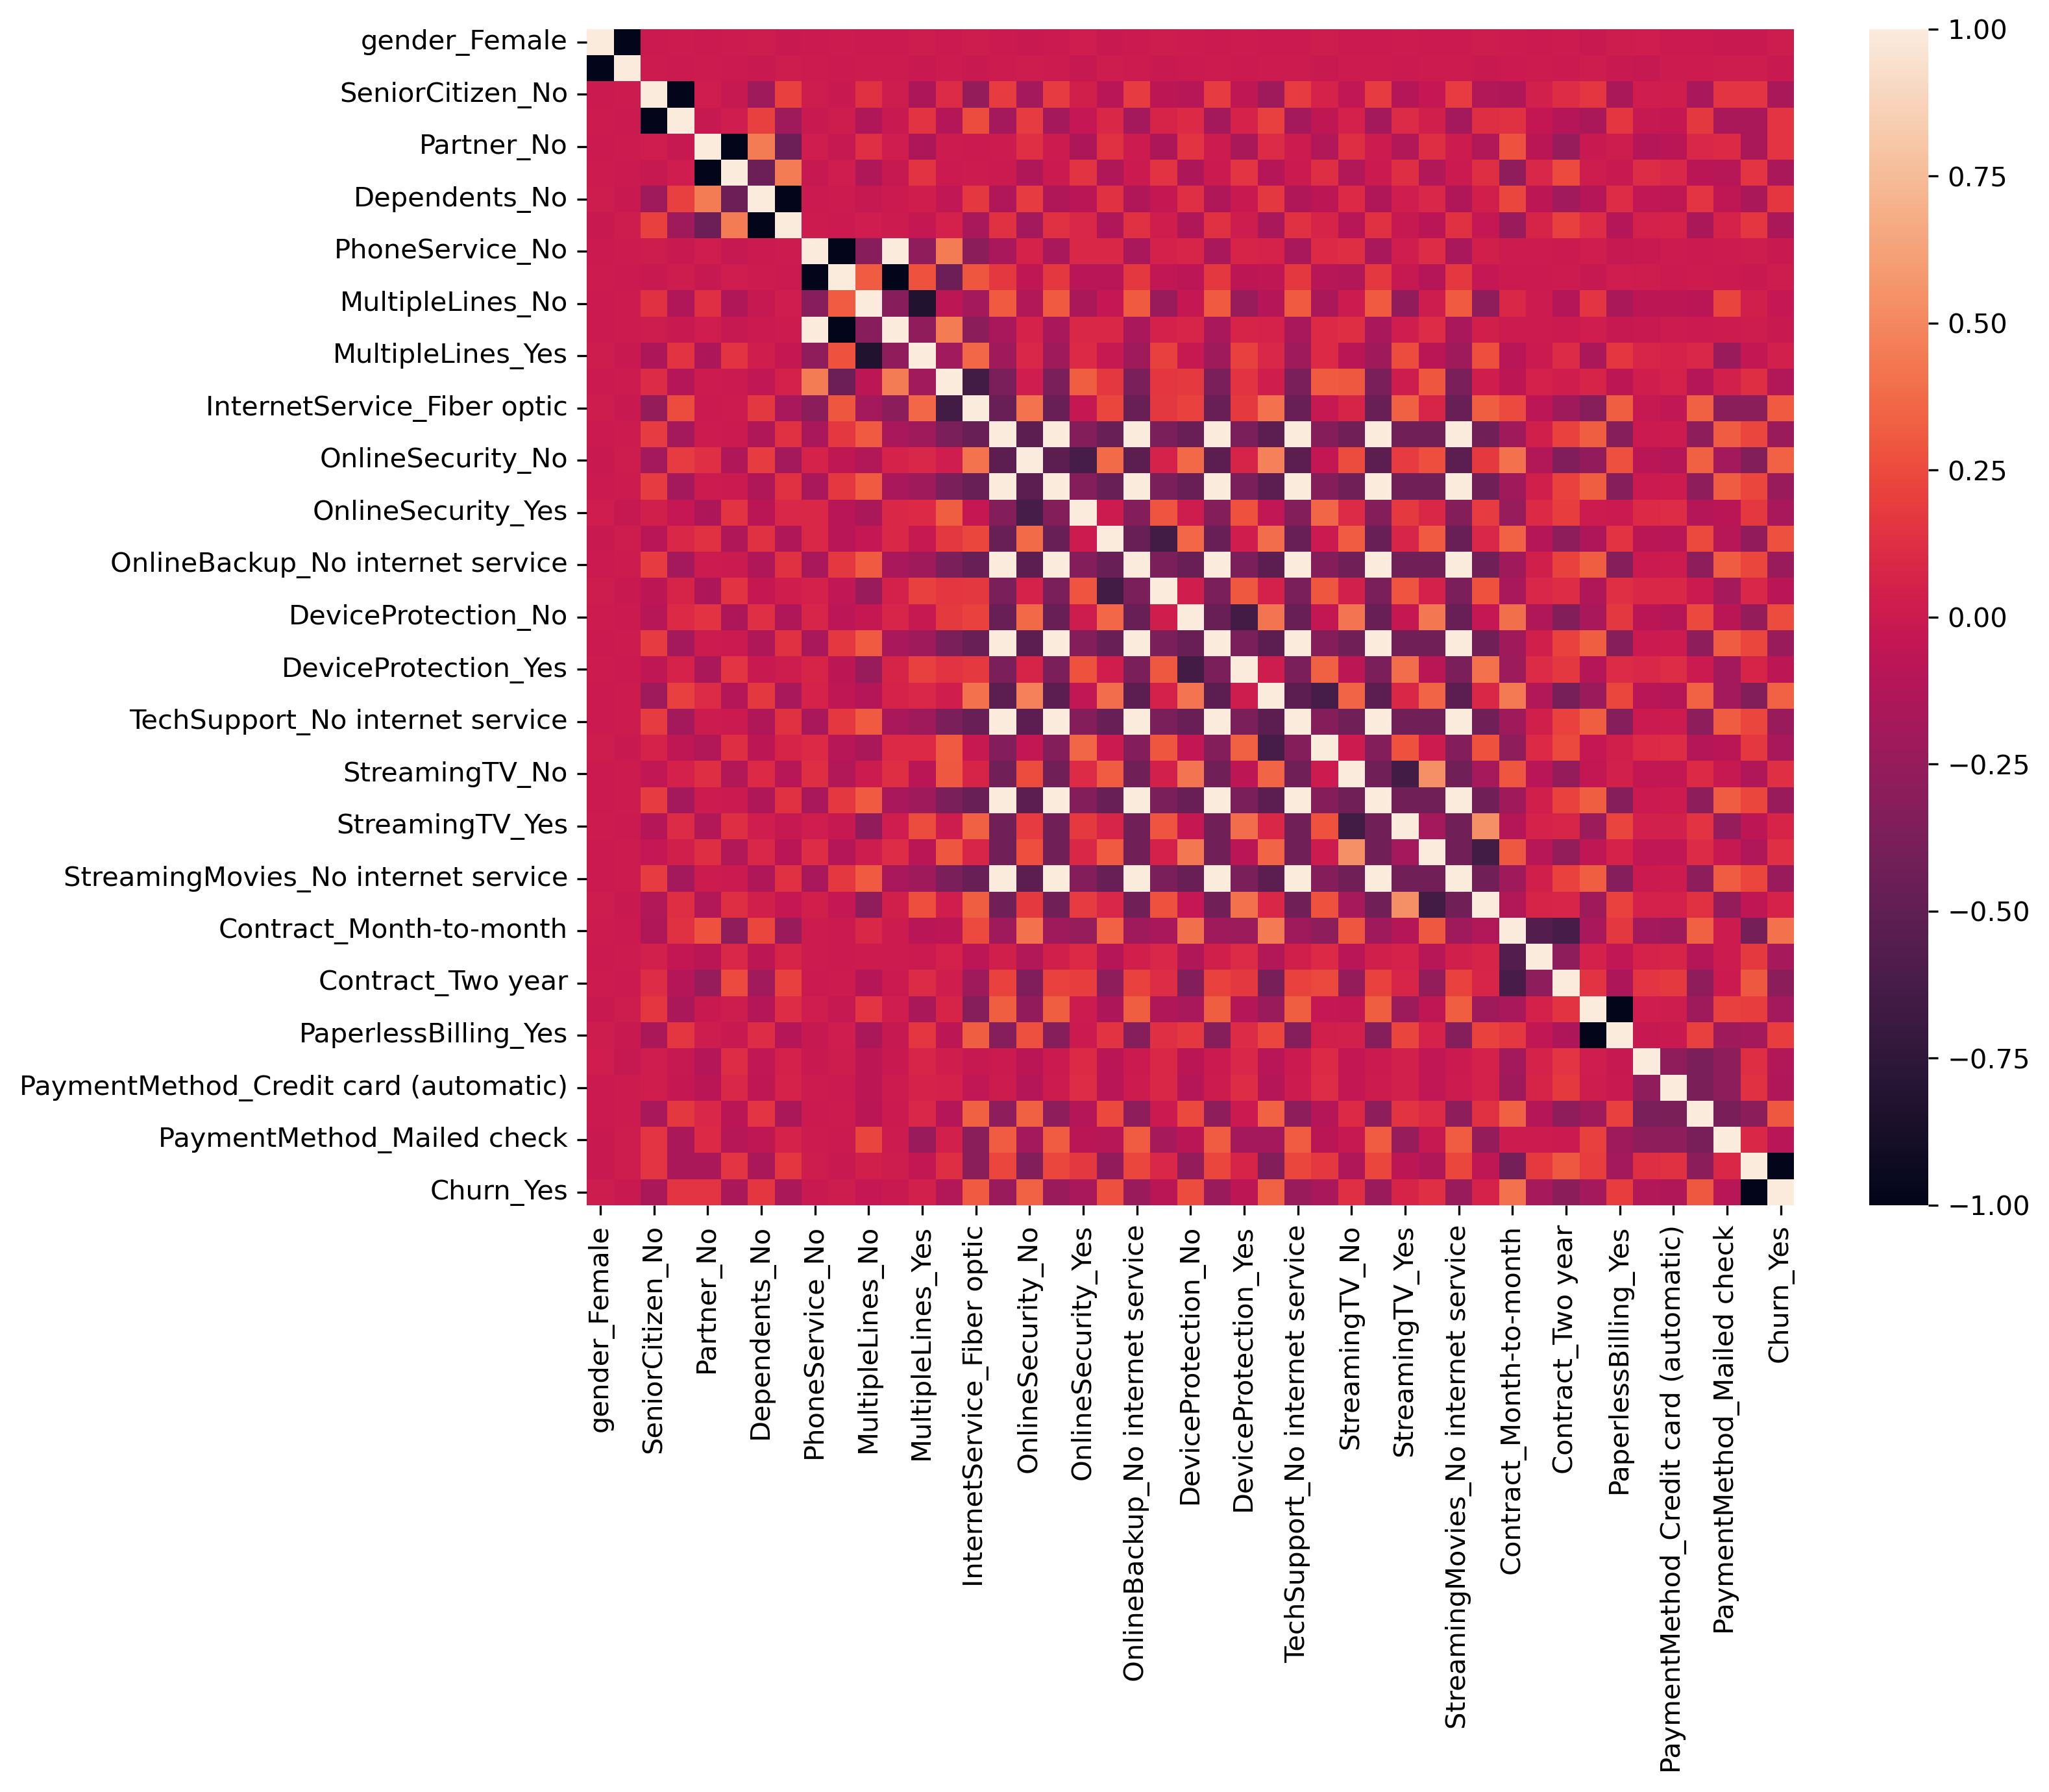

In [29]:
plt.figure(figsize=(10,8),dpi=300)
sns.heatmap(df_corr)

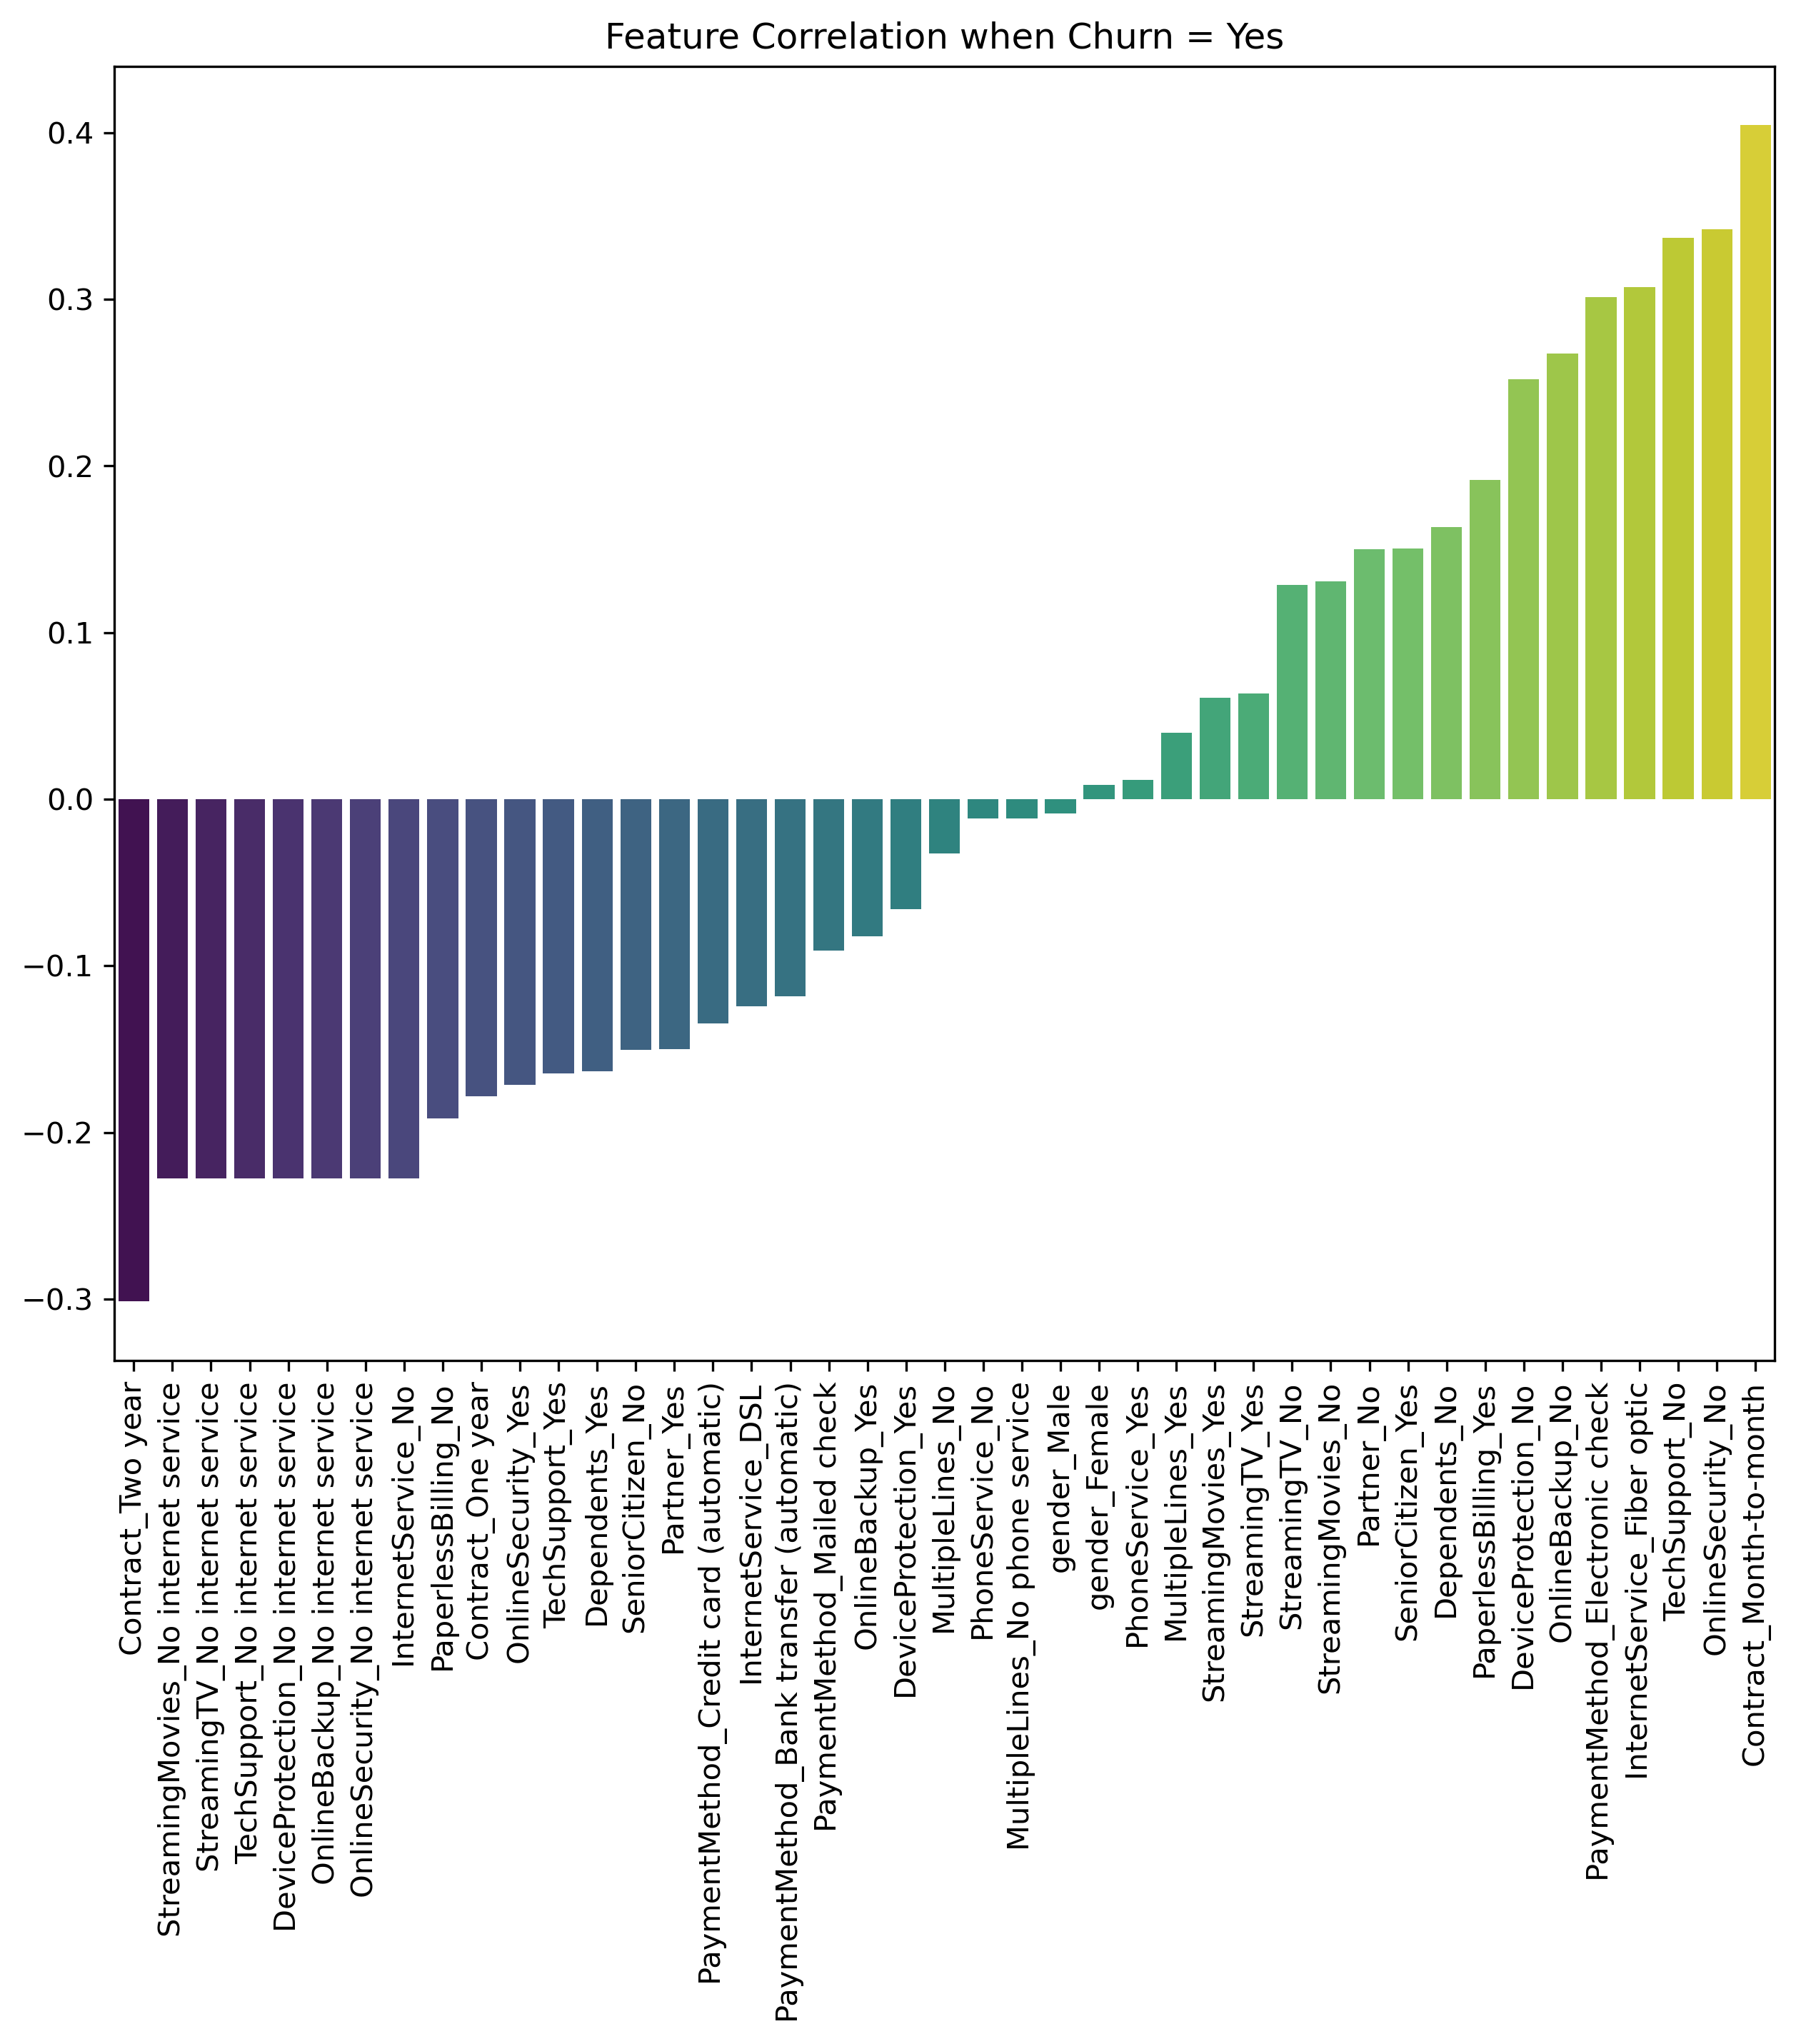

In [30]:
plt.figure(figsize=(10,8),dpi=300)
sns.barplot(x=df_corr['Churn_Yes'].sort_values().iloc[1:-1].index,y=df_corr['Churn_Yes'].sort_values().iloc[1:-1].values,palette='viridis')
plt.title('Feature Correlation when Churn = Yes')
plt.xticks(rotation=90);

When customers choose to churn our data shows the features which show the highest positive correlations are:
1. Contract Month to Month
2. Online Security Not present
3. Tech Support Not Present

The features which show the highest negative correlations are:
1. Contract Two Year
2. Streaming Movies- No internet service
3. Streaming Tv- No internet service


#### Now we repeat this process for Customers who dont Churn to find out what features correlate with this

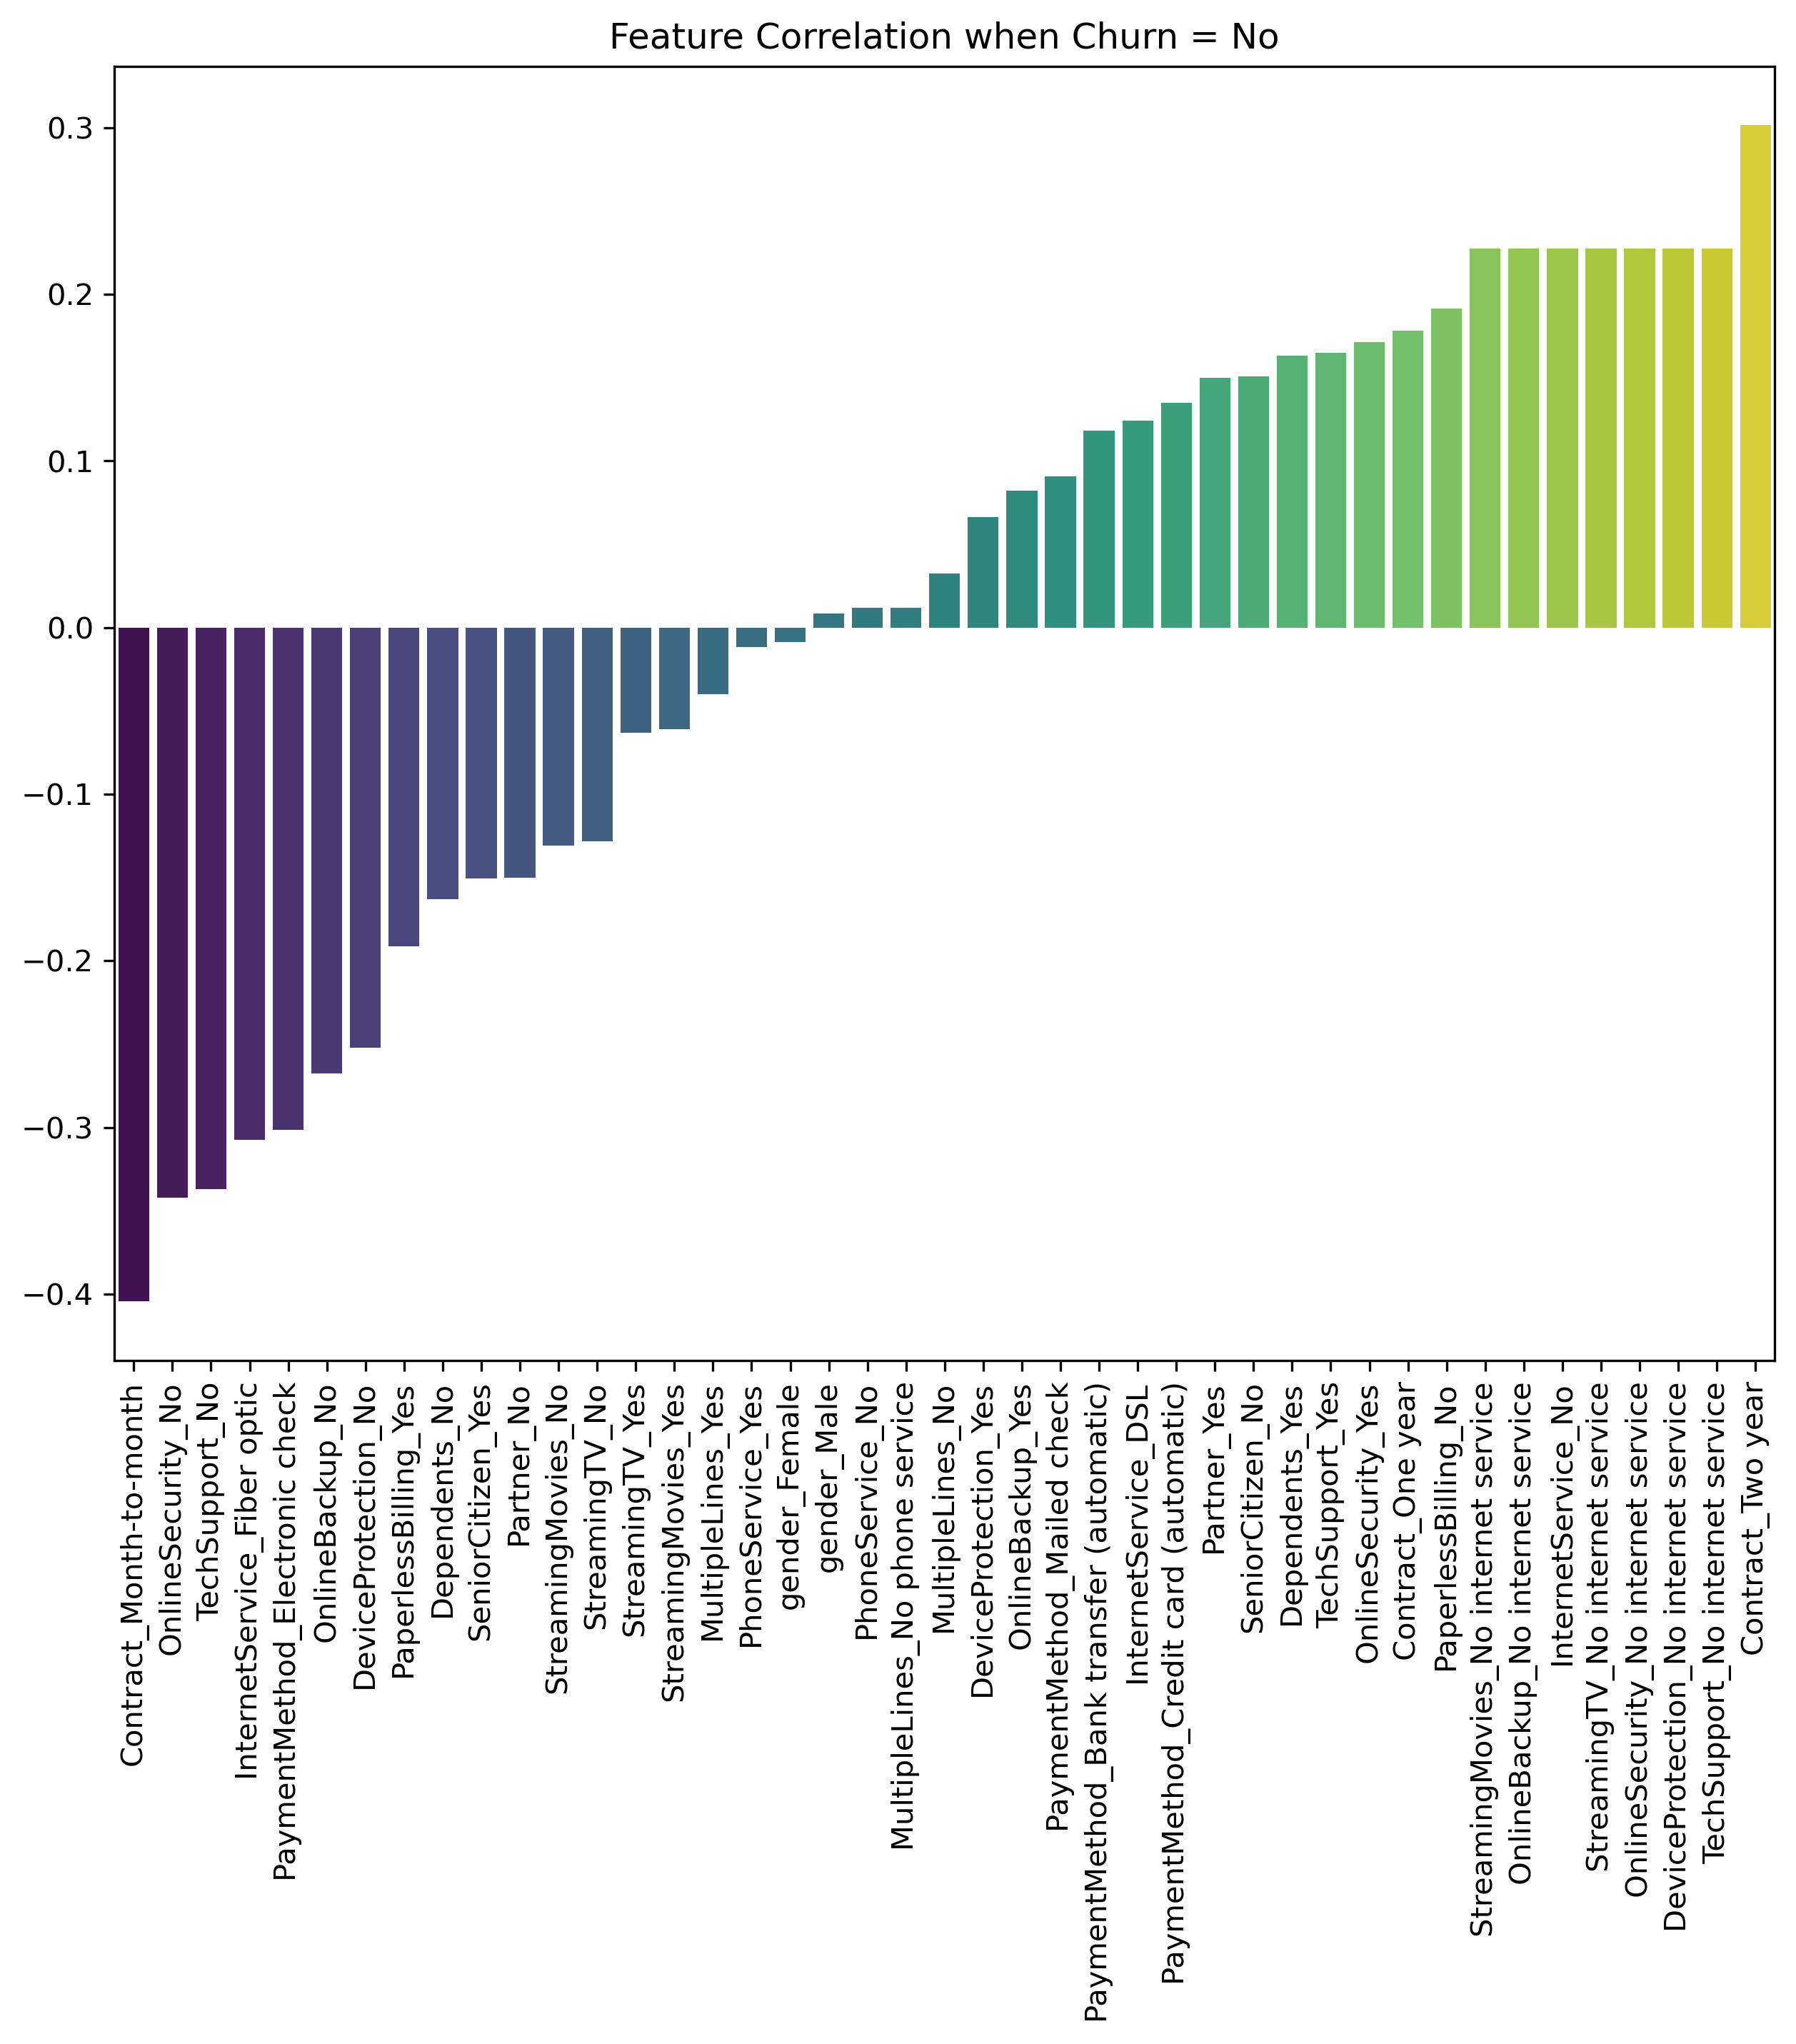

In [31]:
plt.figure(figsize=(10,8),dpi=300)
sns.barplot(x=df_corr['Churn_No'].sort_values().iloc[1:-1].index,y=df_corr['Churn_No'].sort_values().iloc[1:-1].values,palette='viridis')
plt.title('Feature Correlation when Churn = No')
plt.xticks(rotation=90);

When customers choose not to churn our data shows the features which show the highest positive correlations are:
1. Contract Two Year
2. Tech Support- No internet service
3. Device Protection- No internet service

The features which show the highest negative correlations are:
1. Contract Month to Month
2. Online Security Not present
3. Tech Support Not Present



#### Now lets further seperate out the Total Charges into 3 parts and further explore it

In [32]:
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

In [33]:
def totalCharges_seperated (total_charges):
    if total_charges <= 3000:
        return 'Total Charges Beetween 0 and 3000'
    elif total_charges > 3000 and total_charges <=6000:
        return 'Total Charges Beetween 3000 and 6000'
    else:
        return 'Total Charges greater than 6000'
    

In [34]:
df['seperated_total_charges'] = df['TotalCharges'].apply(totalCharges_seperated)

<AxesSubplot:xlabel='seperated_total_charges', ylabel='count'>

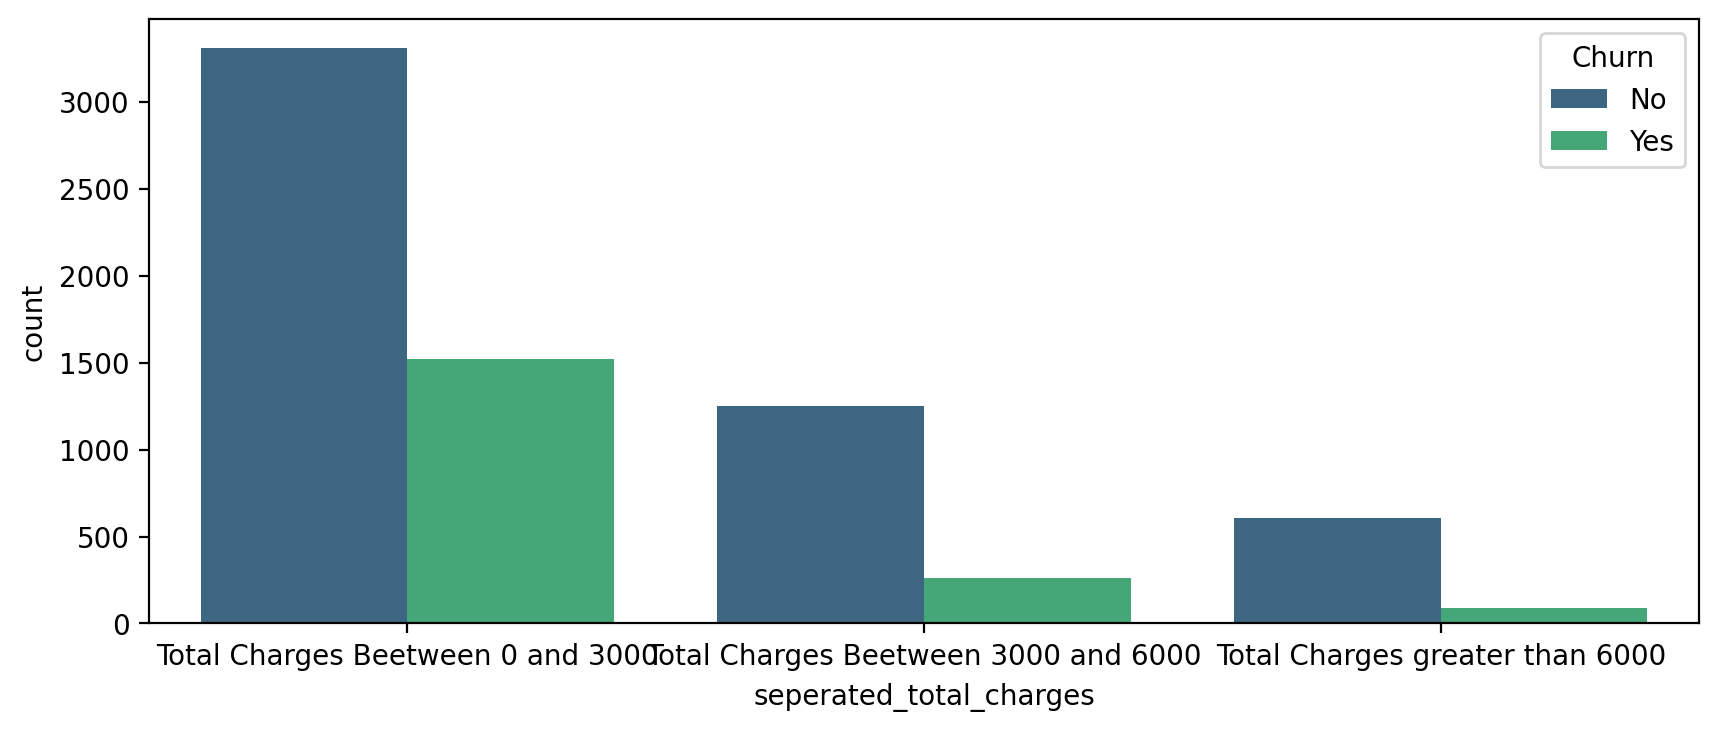

In [35]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='seperated_total_charges',hue='Churn',palette='viridis')

#### Now lets do the same for tenure

In [36]:
  def yearly_tenure(tenure):
    if tenure <= 12:
        return 1
    elif tenure >12 and tenure <=24:
        return 2
    elif tenure >24 and tenure <=36:
        return 3
    elif tenure >36 and tenure <=48:
        return 4
    elif tenure >48 and tenure <=60:
        return 5
    elif tenure > 60 and tenure <=72:
        return 6

In [37]:
df['yearly_tenure'] = df['tenure'].apply(yearly_tenure)

Text(0.5, 0, 'Tenure in years')

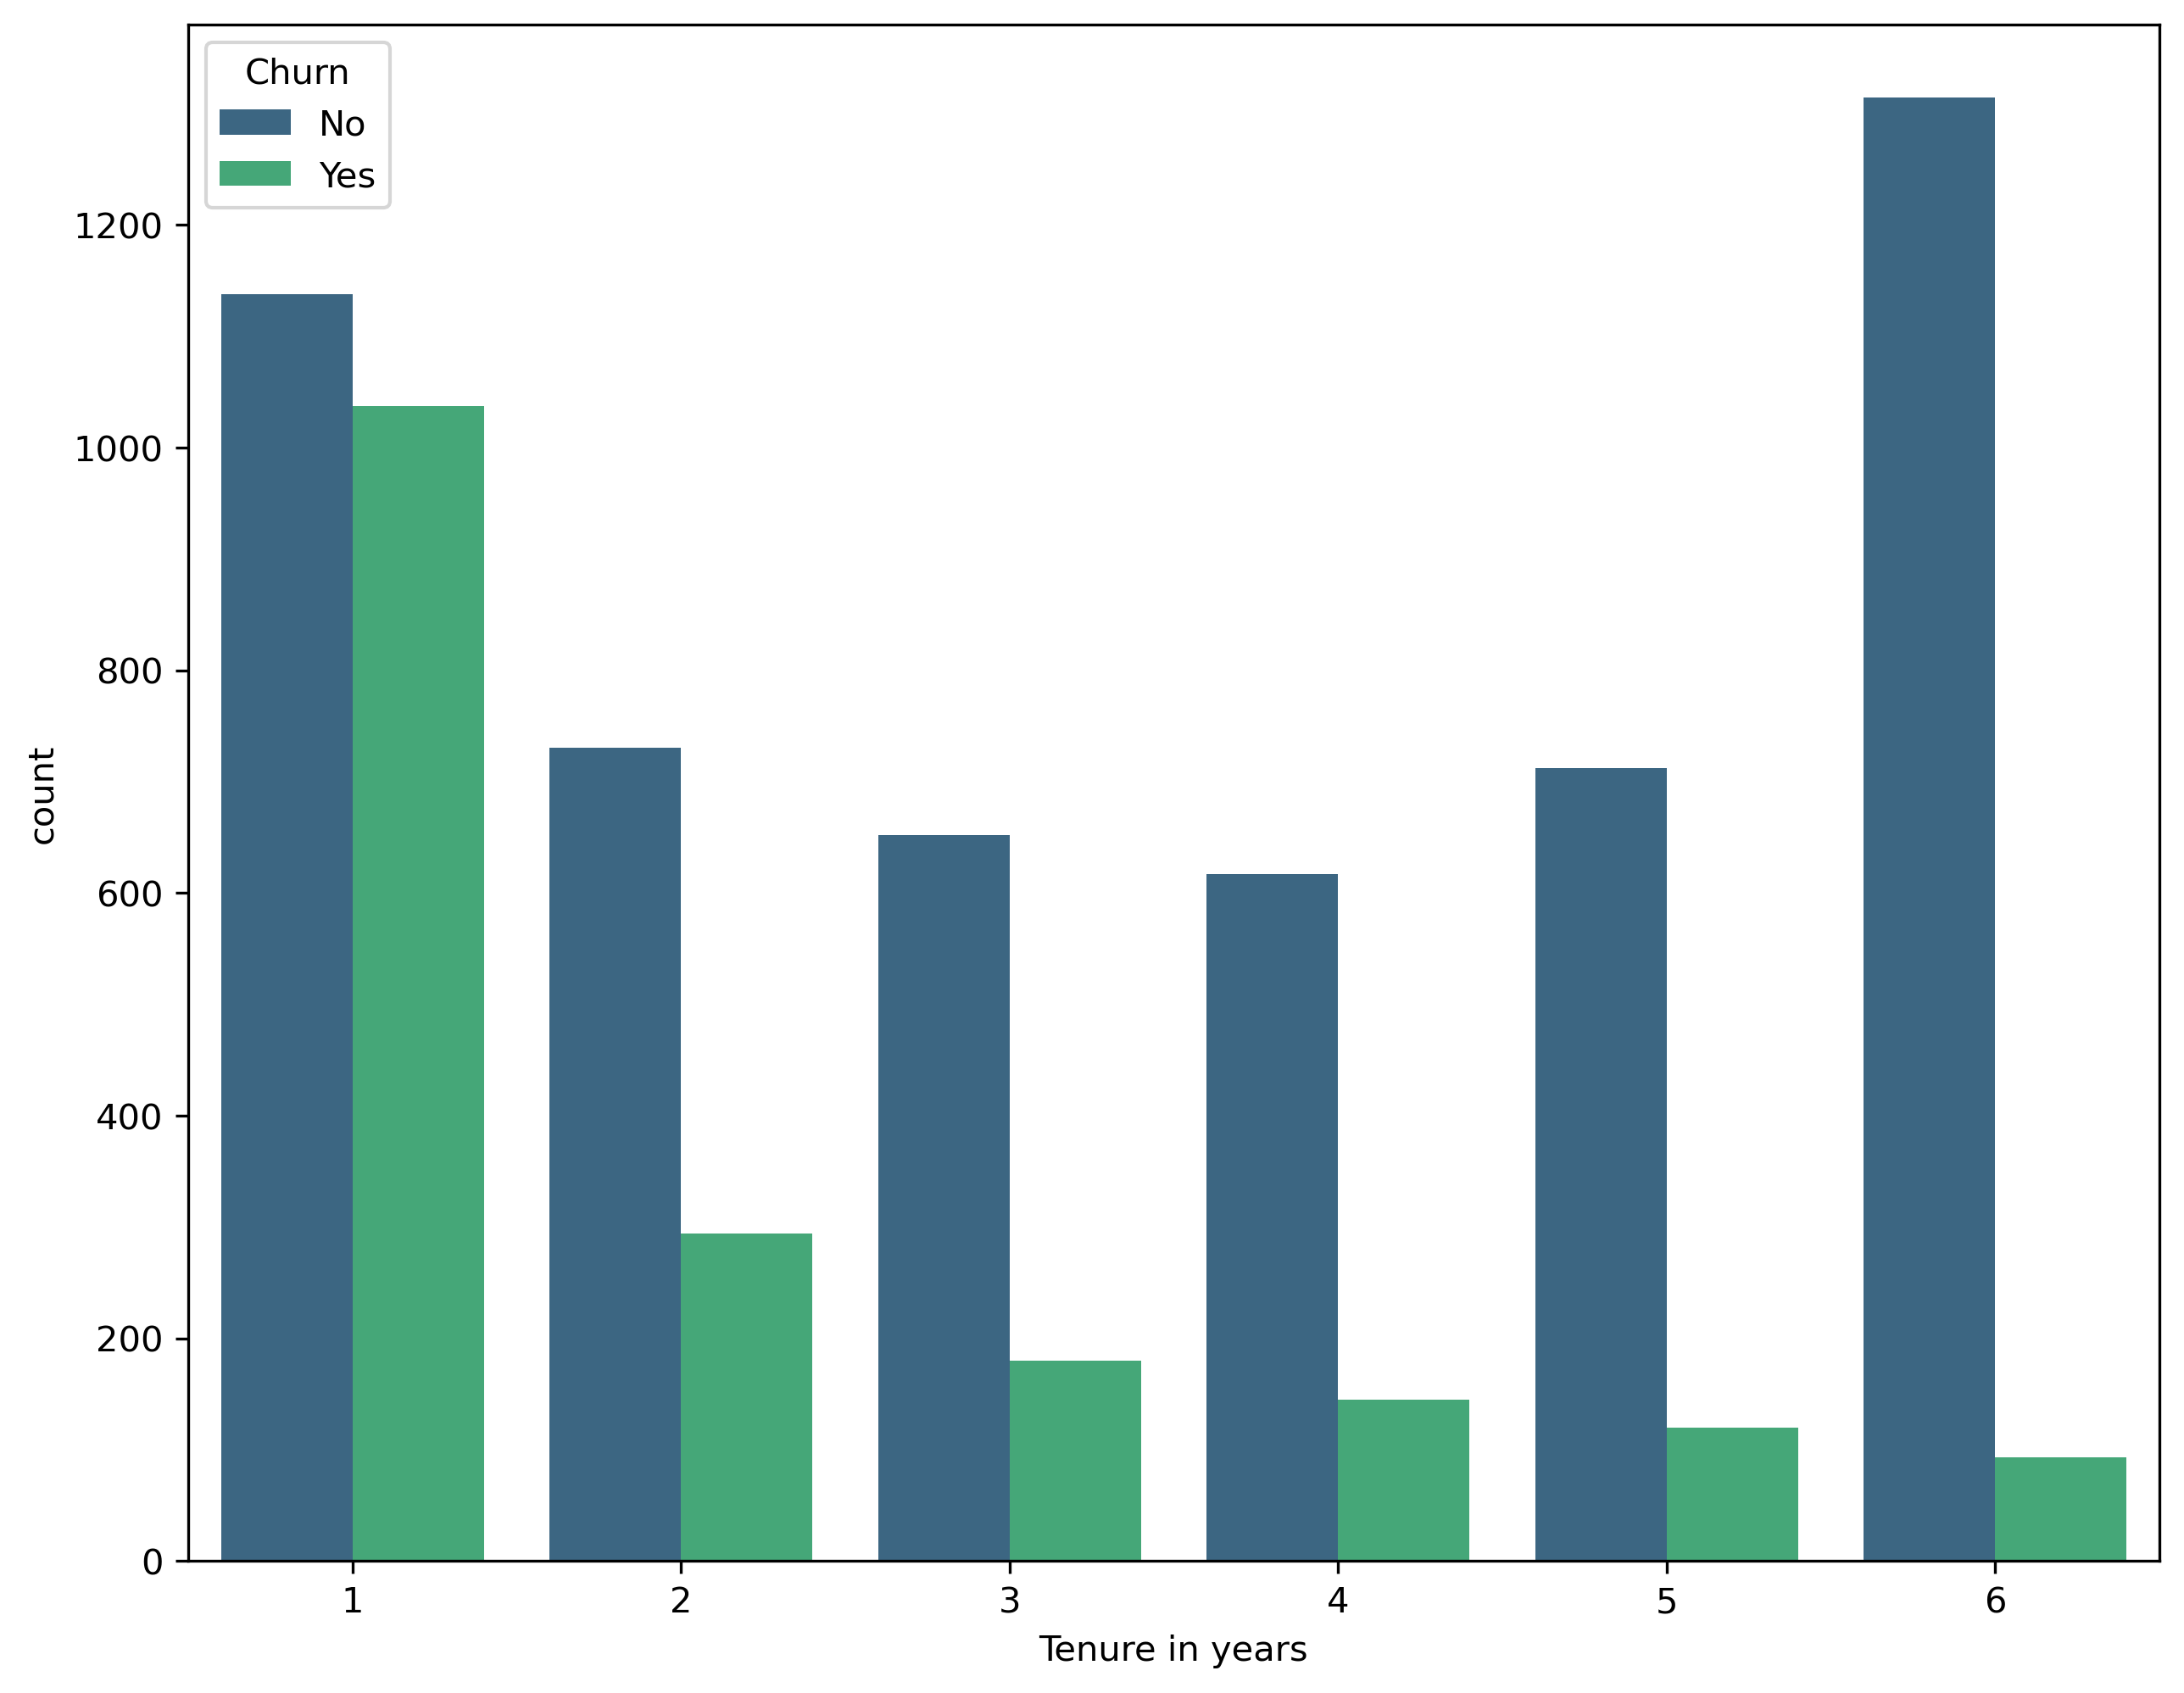

In [38]:
plt.figure(figsize=(10,8),dpi=300)
sns.countplot(data=df,x='yearly_tenure',hue='Churn',palette='viridis')
plt.xlabel('Tenure in years')



In [39]:
df['MonthlyCharges'].describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: MonthlyCharges, dtype: float64

#### Seperate out Monthly Charges into plans
I am going to seperate out the monthly charges into 3 categories 
1. Basic Plan - Monthly Charges lower or equal to 30
2. Advanced Plan - Monthly Charges greater than 30 and up to 60
3. Premium Plan - Monthly Charges greater than 60 and up to 100
4. Executive Plan = Monthly Charges greater than 100

In [40]:
  def Monthly_plans(monthly_charge):
    if monthly_charge <= 30:
        return 'Basic Plan'
    elif monthly_charge >30 and monthly_charge <= 60:
        return 'Advanced Plan'
    elif monthly_charge >60 and monthly_charge <= 100:
        return 'Premium Plan'
    elif monthly_charge >100:
        return 'Executive Plan'
    

In [41]:
df['PlanType'] = df['MonthlyCharges'].apply(Monthly_plans)

Text(0.5, 0, 'Type of Plan')

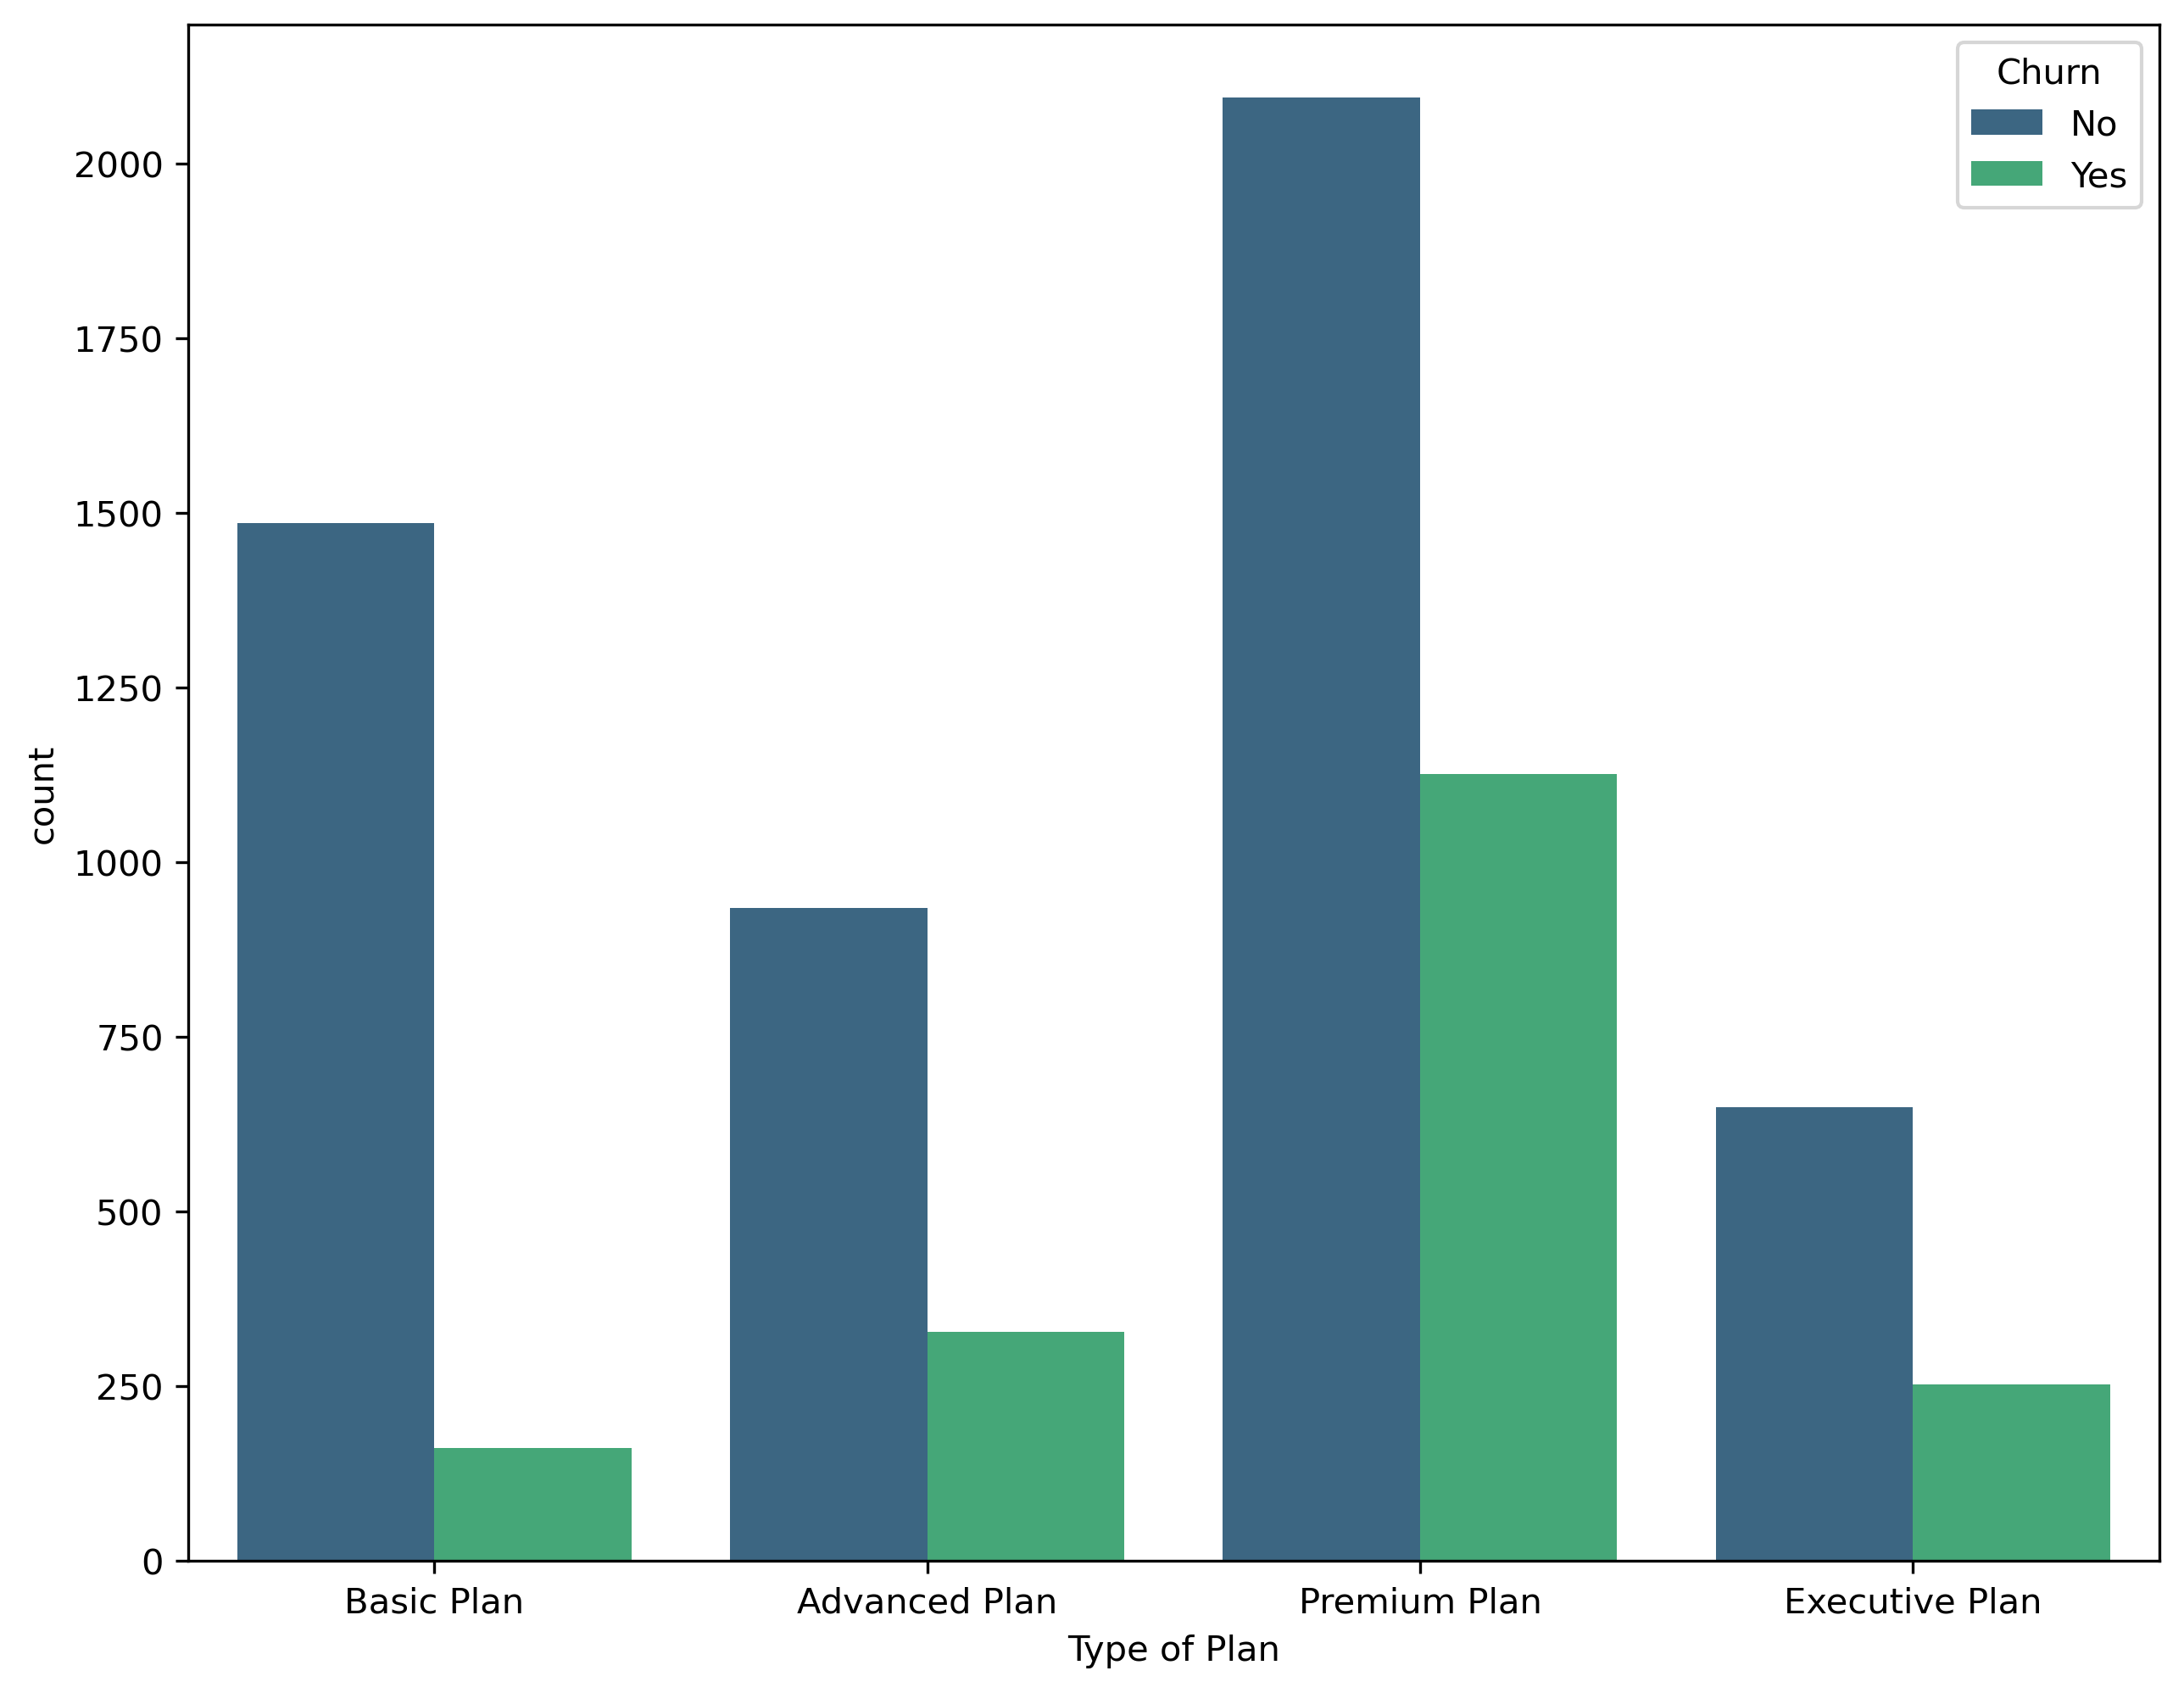

In [42]:
plt.figure(figsize=(10,8),dpi=300)
sns.countplot(data=df,x='PlanType',hue='Churn',palette='viridis')
plt.xlabel('Type of Plan')



#### Model Building
I will be training 4 Different ML models on this Dataset and using both a confusion matric and classification report to analyse what models gave me the best predictions. The models i will be using are:
1. K nearest neighbours
2. Support Vector Machines
3. Gradient Boosting
4. Adaptive Boosting
 

#### Training/Testing Splits

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X= pd.get_dummies(df.drop(['Churn','customerID'],axis=1),drop_first=True)
y= df['Churn']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Scale Data

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler= StandardScaler()

In [48]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### KNN

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [50]:

param_grid= {'n_neighbors':range(1,50), 'metric': ['minkowski','manhattan','euclidean']}
knn_grid_model = GridSearchCV(knn_model,param_grid)
knn_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

In [51]:
knn_predictions = knn_grid_model.predict(scaled_X_test)

In [52]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [53]:
print(classification_report(y_test,knn_predictions))

              precision    recall  f1-score   support

          No       0.85      0.87      0.86      1300
         Yes       0.59      0.56      0.57       458

    accuracy                           0.79      1758
   macro avg       0.72      0.71      0.72      1758
weighted avg       0.78      0.79      0.78      1758



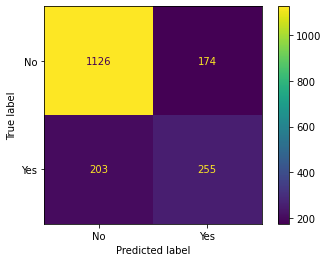

In [54]:
plot_confusion_matrix(knn_grid_model,scaled_X_test,y_test)

#### SVM

In [55]:
from sklearn.svm import SVC

In [56]:
svc = SVC()
param_grid_svm={'C': [0.1,0.5,1,2,10],'gamma':['scale','auto'],'kernel': ['linear','rbf','poly','sigmoid']}

In [57]:
svc_grid_model= GridSearchCV(svc,param_grid_svm,cv=5)

In [58]:
svc_grid_model.fit(scaled_X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [59]:
svc_predictions = svc_grid_model.predict(scaled_X_test)

In [60]:
print(classification_report(y_test,svc_predictions))

              precision    recall  f1-score   support

          No       0.83      0.91      0.87      1300
         Yes       0.64      0.46      0.53       458

    accuracy                           0.79      1758
   macro avg       0.73      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



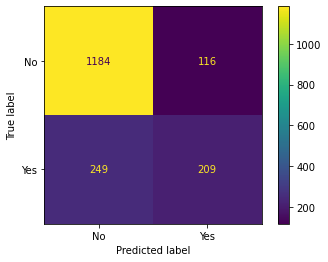

In [61]:
plot_confusion_matrix(svc_grid_model,scaled_X_test,y_test)

#### Gradient Boost

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
gbmodel= GradientBoostingClassifier()
gb_param_grid= {'n_estimators':[50,100],'learning_rate':[0.1,0.05,0.2],'max_depth':[3,4,5]}

In [64]:
grid_gb= GridSearchCV(gbmodel,gb_param_grid,cv=5)

In [65]:
grid_gb.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [66]:
gb_predictions = grid_gb.predict(X_test)

In [67]:
print(classification_report(y_test,gb_predictions))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      1300
         Yes       0.63      0.50      0.55       458

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71      1758
weighted avg       0.78      0.79      0.78      1758



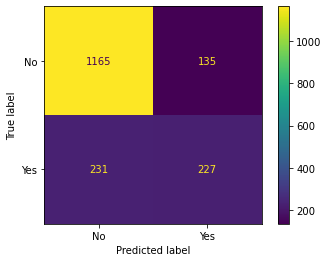

In [68]:
plot_confusion_matrix(grid_gb,X_test,y_test)

#### Adaptive Boost

In [69]:
from sklearn.ensemble import AdaBoostClassifier

In [70]:
Ada_model= AdaBoostClassifier()
param_grid_Ada= {'n_estimators':range(1,50)}

In [71]:
error_rates= []
for n in range(1,100):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    
    predict= model.predict(X_test)
    
    error= 1- accuracy_score(y_test,predict)
    
    error_rates.append(error)

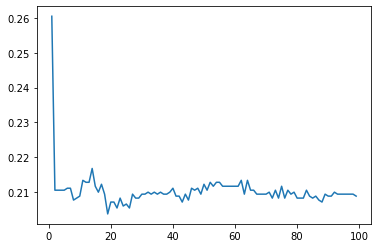

In [72]:
plt.plot(range(1,100),error_rates)

In [73]:
Ada_model_final = AdaBoostClassifier(n_estimators=20)
Ada_model_final.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=20)

In [74]:
Ada_prediction= Ada_model_final.predict(X_test)

In [75]:
print(classification_report(y_test,Ada_prediction))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      1300
         Yes       0.62      0.53      0.57       458

    accuracy                           0.79      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.78      0.79      0.79      1758



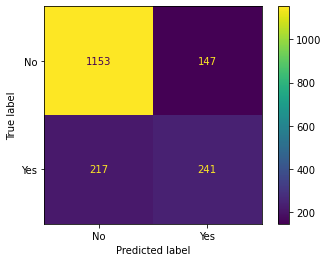

In [76]:
plot_confusion_matrix(Ada_model_final,X_test,y_test)

All 4 models had an accuracy score of 79% so in a real world setting we would be able to pick any for final deployment. However the Adaptive Boosting model is my preferred choice as this gave me the best precision and recall values for customers who chose to churn

The confusion matrix for Adaptive Boost gave an accuracy of 79%. When churn was No the model gave a precision of 84% and recall of 89% . When churn was Yes the model gave a precision of 62% and recall of 57%

#### Feature Importance Plot for AdaBoost Model

In [77]:
Ada_model_final.feature_importances_

array([0.2 , 0.  , 0.1 , 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.05, 0.05,
       0.1 , 0.  , 0.  , 0.05, 0.  , 0.  , 0.05, 0.  , 0.  , 0.  , 0.  ,
       0.05, 0.  , 0.05, 0.05, 0.05, 0.05, 0.  , 0.05, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.05])

In [78]:
features= pd.DataFrame(index= X.columns,data=model.feature_importances_,columns=['Importance'])

<AxesSubplot:ylabel='Importance'>

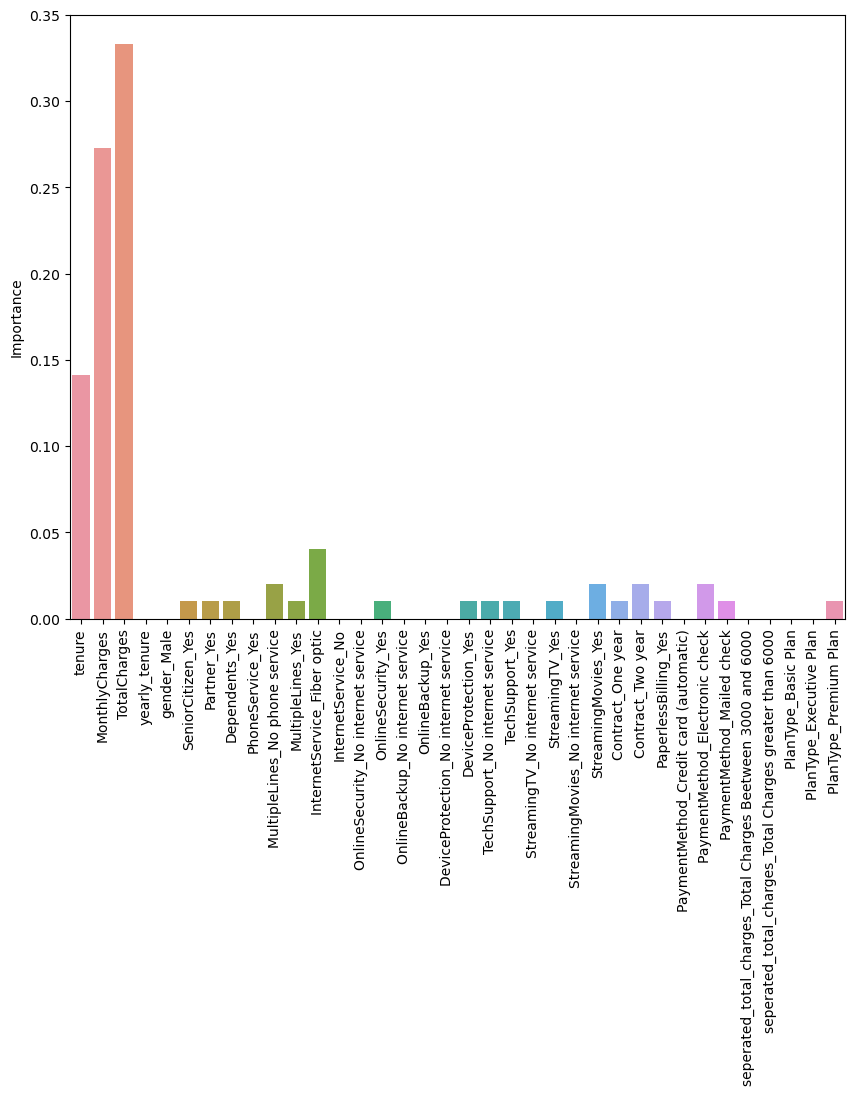

In [79]:
plt.figure(figsize=(10,8),dpi=100)
plt.xticks(rotation=90)
sns.barplot(data=features,x=features.index,y='Importance')

According to the model the most important feautures for predicting if a customer will churn are
1. Tenure
2. MonthlyCharges
3. TotalCharges
4. Internet Service Fiber optic